In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-detection/SMSSpamCollection


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
%matplotlib inline

In [3]:
#nltk.download_shell()

In [4]:
messages  = [line.rstrip() for line in open('../input/spam-detection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
for messagem_number, message in enumerate(messages[:15]):
  print(messagem_number, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
messages = pd.read_csv('../input/spam-detection/SMSSpamCollection', sep='\t', names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Análise exploratória de dados

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

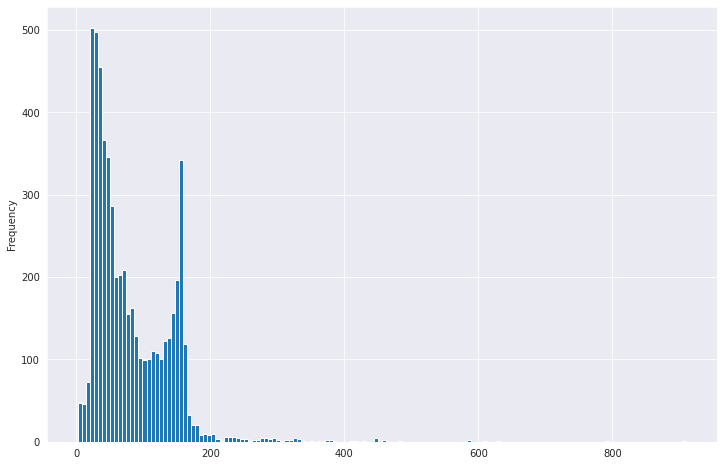

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
messages['length'].plot(kind='hist', bins=150)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

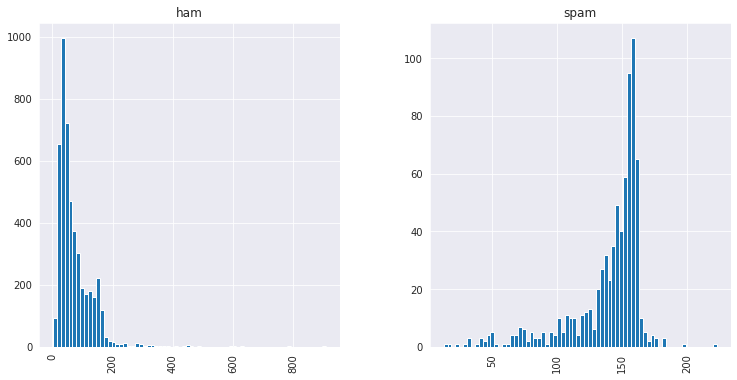

In [16]:
messages.hist(column='length', by='label',bins=70, figsize=(12,6))

# Exemplos de Pré-processamento de texto

In [17]:
#Primeiro removendo a pontuação
mess='Mensagem de exemplo! Notem: ela possui pontuação'

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
sempot = [car for car in mess if car not in string.punctuation]

In [20]:
sempot

['M',
 'e',
 'n',
 's',
 'a',
 'g',
 'e',
 'm',
 ' ',
 'd',
 'e',
 ' ',
 'e',
 'x',
 'e',
 'm',
 'p',
 'l',
 'o',
 ' ',
 'N',
 'o',
 't',
 'e',
 'm',
 ' ',
 'e',
 'l',
 'a',
 ' ',
 'p',
 'o',
 's',
 's',
 'u',
 'i',
 ' ',
 'p',
 'o',
 'n',
 't',
 'u',
 'a',
 'ç',
 'ã',
 'o']

In [21]:
sempot = ''.join(sempot)
sempot

'Mensagem de exemplo Notem ela possui pontuação'

In [22]:
#segundo remover as stopwords
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
tst = 'Sample message! Notice: it has punctuation.'

In [25]:
clean_mess=[word for word in tst.split() if word.lower() not in stopwords.words('english') ]

In [26]:
clean_mess

['Sample', 'message!', 'Notice:', 'punctuation.']

# Pré-processamentos dos dados

In [27]:
def text_process(mess):
   
    #Retira as pontuações
    nopunc = [char for char in mess if char not in string.punctuation]

    # Junbtar para formar novamente as strings
    nopunc = ''.join(nopunc)
    
    # Remover as stopwords
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vetorização

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [32]:
print(len(bow_transformer.vocabulary_))

11425


In [33]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [34]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [35]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
messages_bow = bow_transformer.transform(messages['message'])

In [37]:
print('Corpo da matriz: ', messages_bow.shape)
print('Quantidade de não zeros: ', messages_bow.nnz)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Esparcidade:{}'.format(sparsity))

Corpo da matriz:  (5572, 11425)
Quantidade de não zeros:  50548
Esparcidade:0.07940295412668218


# TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [40]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [41]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


# Treinando o modelo

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [44]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [45]:
print('Predito:', spam_detect_model.predict(tfidf4)[0])
print('Esperado:', messages.label[3])

Predito: ham
Esperado: ham


# Treino teste

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


# Criando um Pipeline

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  #Conta as strings
    ('tfidf', TfidfTransformer()),  # Converte em TF-IDF
    ('classifier', MultinomialNB()),  # Escolhendo o classificador
])

In [50]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f6316722c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [51]:
predictions = pipeline.predict(msg_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1012
        spam       0.72      1.00      0.83       103

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



# Arvores aleatórias

In [54]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ RandomForestClassifier
])

In [55]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f6316722c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [56]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99       996
        spam       0.82      0.99      0.90       119

    accuracy                           0.98      1115
   macro avg       0.91      0.98      0.94      1115
weighted avg       0.98      0.98      0.98      1115

